In [884]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
RANDOM_STATE=42

In [885]:
import seaborn as sns

In [886]:
data_train = pd.read_csv('train_sales_predict.csv')

In [887]:
data_train.head()

,id,date,street_id,build_tech,floor,area,rooms,balcon,metro_dist,g_lift,...,kw5,kw6,kw7,kw8,kw9,kw10,kw11,kw12,kw13,price
0,0,2011-1,560,NaN,2,59,3,0,30.0,1.0,...,0,0,0,0,0,0,0,0,0,4510000
1,1,2011-1,667,NaN,10,50,2,1,25.0,NaN,...,0,0,0,0,0,0,0,0,0,13231000
2,2,2011-1,90,0.0,1,48,2,0,25.0,0.0,...,0,0,0,0,0,0,0,0,0,2008000
3,3,2011-1,94,1.0,3,62,3,1,30.0,NaN,...,0,0,0,0,0,0,0,0,0,12680000
4,4,2011-1,232,0.0,3,60,3,0,25.0,NaN,...,0,0,0,0,0,0,0,0,0,3335000


In [888]:
target_column = data_train[['price']]
data_train.drop('price', axis=1, inplace=True)

In [889]:
del data_train['date']

In [890]:
del data_train['id']

In [891]:
data_train.shape

(100000, 22)

In [892]:
data_train.head()

,street_id,build_tech,floor,area,rooms,balcon,metro_dist,g_lift,n_photos,kw1,...,kw4,kw5,kw6,kw7,kw8,kw9,kw10,kw11,kw12,kw13
0,560,NaN,2,59,3,0,30.0,1.0,5,0,...,0,0,0,0,0,0,0,0,0,0
1,667,NaN,10,50,2,1,25.0,NaN,1,0,...,0,0,0,0,0,0,0,0,0,0
2,90,0.0,1,48,2,0,25.0,0.0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,94,1.0,3,62,3,1,30.0,NaN,3,0,...,0,0,0,0,0,0,0,0,0,0
4,232,0.0,3,60,3,0,25.0,NaN,3,0,...,0,0,0,0,0,0,0,0,0,0


In [893]:
data_train.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   street_id   100000 non-null  int64  
 1   build_tech  70265 non-null   float64
 2   floor       100000 non-null  int64  
 3   area        100000 non-null  int64  
 4   rooms       100000 non-null  int64  
 5   balcon      100000 non-null  int64  
 6   metro_dist  95104 non-null   float64
 7   g_lift      70008 non-null   float64
 8   n_photos    100000 non-null  int64  
 9   kw1         100000 non-null  int64  
 10  kw2         100000 non-null  int64  
 11  kw3         100000 non-null  int64  
 12  kw4         100000 non-null  int64  
 13  kw5         100000 non-null  int64  
 14  kw6         100000 non-null  int64  
 15  kw7         100000 non-null  int64  
 16  kw8         100000 non-null  int64  
 17  kw9         100000 non-null  int64  
 18  kw10        100000 non-null  int64  
 19  kw1

In [894]:
data_train.isna().sum()

street_id         0
build_tech    29735
floor             0
area              0
rooms             0
balcon            0
metro_dist     4896
g_lift        29992
n_photos          0
kw1               0
kw2               0
kw3               0
kw4               0
kw5               0
kw6               0
kw7               0
kw8               0
kw9               0
kw10              0
kw11              0
kw12              0
kw13              0
dtype: int64

In [895]:
del data_train['g_lift']
del data_train['build_tech']

In [896]:
data_train['metro_dist'].unique()

array([30., 25., 20., 15., 10., nan,  0.,  5.])

In [897]:
data_train['metro_dist'].median(), data_train['metro_dist'].mean(), data_train['metro_dist'].mode()

(25.0,
 22.154430938761777,
 0    30.0
 Name: metro_dist, dtype: float64)

C:\Users\79252\AppData\Local\Temp\ipykernel_21816\2218872790.py:20: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


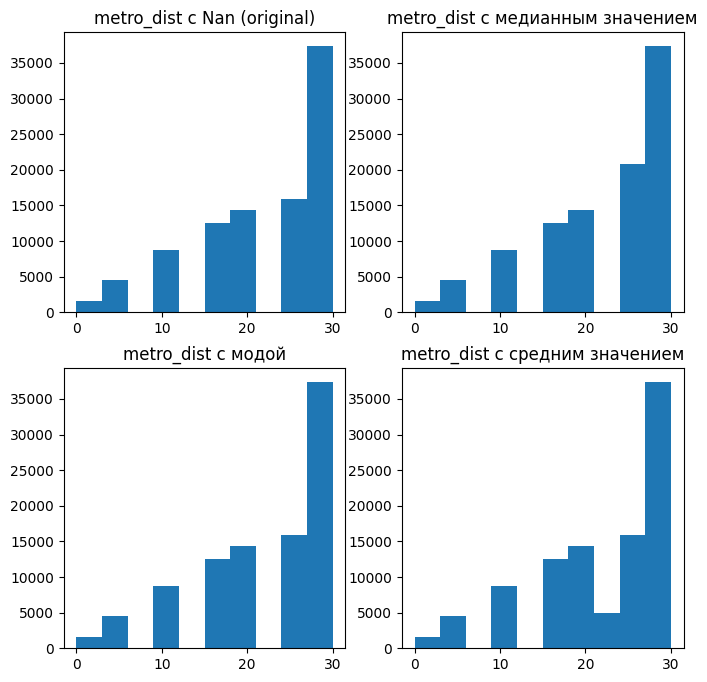

In [898]:
metro_dist_median = data_train['metro_dist'].fillna(data_train['metro_dist'].median())
metro_dist_mean = data_train['metro_dist'].fillna(data_train['metro_dist'].mean())
metro_dist_mode = data_train['metro_dist'].fillna(data_train['metro_dist'].mode())


fig, ax = plt.subplots(nrows=2, ncols=2, figsize = (8,8))


ax[0,0].hist(data_train['metro_dist'] )
ax[0,0].set_title('metro_dist с Nan (original)')

ax[0,1].hist(metro_dist_median)
ax[0,1].set_title('metro_dist с медианным значением')

ax[1,1].hist(metro_dist_mean )
ax[1,1].set_title('metro_dist с средним значением')

ax[1,0].hist(metro_dist_mode)
ax[1,0].set_title('metro_dist с модой')
fig.show()


в данном случае распределение почти не меняется, если заполнять пропуски мединаой, так что оставляем ее. Мода - это как раз пропуски, так что ее поставить мы не можем

In [899]:
data_train['metro_dist'] = data_train['metro_dist'].fillna(data_train['metro_dist'].median())


In [900]:
data_train.isna().sum()

street_id     0
floor         0
area          0
rooms         0
balcon        0
metro_dist    0
n_photos      0
kw1           0
kw2           0
kw3           0
kw4           0
kw5           0
kw6           0
kw7           0
kw8           0
kw9           0
kw10          0
kw11          0
kw12          0
kw13          0
dtype: int64

теперь все колонки без пропущенных значений

In [901]:
for col in data_train.columns:
    print(col, data_train[f'{col}'].value_counts().shape[0])

street_id 672
floor 25
area 115
rooms 6
balcon 3
metro_dist 7
n_photos 12
kw1 2
kw2 2
kw3 2
kw4 2
kw5 2
kw6 2
kw7 2
kw8 2
kw9 2
kw10 2
kw11 2
kw12 2
kw13 2


''

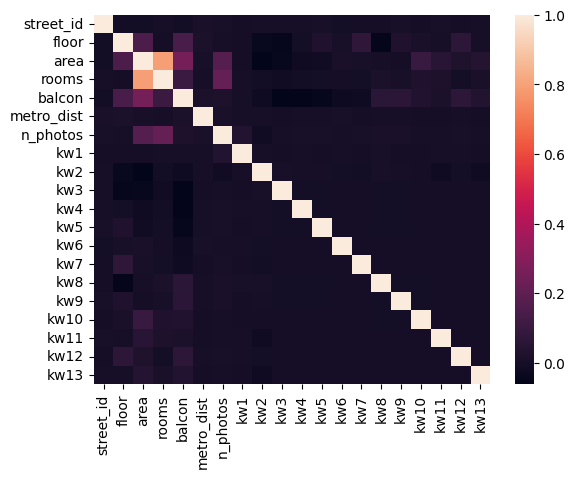

In [902]:
sns.heatmap(data_train.corr())
;

не будем кодировать rooms и floor, оставим порядок таким, какой он был, по возрастанию

In [903]:
cat_cols_to_OHE = [ 'balcon','n_photos','metro_dist'] # 'date'   можно закодировать one_hot_encoding
cat_cols_many_values = ['street_id','area'] #слишком много колонок получится при ohe, будем пробовать другие методы
# ['floor', 'rooms'] уже закодированы LabelEncoding

In [904]:
data_train = pd.get_dummies(data_train , columns= cat_cols_to_OHE)

In [905]:
data_train.head()

,street_id,floor,area,rooms,kw1,kw2,kw3,kw4,kw5,kw6,...,n_photos_9,n_photos_10,n_photos_11,metro_dist_0.0,metro_dist_5.0,metro_dist_10.0,metro_dist_15.0,metro_dist_20.0,metro_dist_25.0,metro_dist_30.0
0,560,2,59,3,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,667,10,50,2,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,90,1,48,2,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,94,3,62,3,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,232,3,60,3,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [906]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [907]:
scaler =  MinMaxScaler()
data_train[['floor', 'rooms', 'area']] = scaler.fit_transform(data_train[['floor', 'rooms', 'area'] ])

In [908]:
data_train

,street_id,floor,area,rooms,kw1,kw2,kw3,kw4,kw5,kw6,...,n_photos_9,n_photos_10,n_photos_11,metro_dist_0.0,metro_dist_5.0,metro_dist_10.0,metro_dist_15.0,metro_dist_20.0,metro_dist_25.0,metro_dist_30.0
0,560,0.041667,0.159574,0.4,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,667,0.375000,0.111702,0.2,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,90,0.000000,0.101064,0.2,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,94,0.083333,0.175532,0.4,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,232,0.083333,0.164894,0.4,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,401,0.166667,0.005319,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
99996,59,0.125000,0.026596,0.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
99997,253,0.083333,0.122340,0.2,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
99998,305,0.083333,0.808511,0.8,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [909]:
del data_train['street_id']

In [910]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  ElasticNet, Ridge, Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV, cross_val_score

In [911]:
data_train.columns

Index(['floor', 'area', 'rooms', 'kw1', 'kw2', 'kw3', 'kw4', 'kw5', 'kw6',
       'kw7', 'kw8', 'kw9', 'kw10', 'kw11', 'kw12', 'kw13', 'balcon_0',
       'balcon_1', 'balcon_2', 'n_photos_0', 'n_photos_1', 'n_photos_2',
       'n_photos_3', 'n_photos_4', 'n_photos_5', 'n_photos_6', 'n_photos_7',
       'n_photos_8', 'n_photos_9', 'n_photos_10', 'n_photos_11',
       'metro_dist_0.0', 'metro_dist_5.0', 'metro_dist_10.0',
       'metro_dist_15.0', 'metro_dist_20.0', 'metro_dist_25.0',
       'metro_dist_30.0'],
      dtype='object')

In [912]:
X_train, X_val, y_train, y_val = train_test_split(data_train , target_column , random_state=RANDOM_STATE, train_size=0.8)

In [913]:
lin_reg = ElasticNet()

In [914]:
lin_reg.fit(X_train, y_train)

ElasticNet()

In [915]:
mean_absolute_error(y_train, lin_reg.predict(X_train)), mean_absolute_error(y_val, lin_reg.predict(X_val))

(2565681.009741415, 2551258.3088001716)

In [916]:
data_test = pd.read_csv('test_sales_predict.csv')

In [917]:
data_test

,id,date,street_id,build_tech,floor,area,rooms,balcon,metro_dist,g_lift,...,kw4,kw5,kw6,kw7,kw8,kw9,kw10,kw11,kw12,kw13
0,100000,2012-3,459,NaN,1,60,3,1,30.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,100001,2012-3,344,1.0,10,52,2,1,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2,100002,2012-3,585,0.0,4,54,3,0,30.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,100003,2012-3,494,NaN,2,52,2,1,25.0,1.0,...,0,0,0,0,0,0,0,0,0,0
4,100004,2012-3,622,1.0,9,60,3,1,15.0,NaN,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,199995,2013-9,613,1.0,2,34,1,1,25.0,NaN,...,0,0,0,0,0,0,0,0,0,0
99996,199996,2013-9,167,1.0,10,61,3,1,30.0,NaN,...,0,0,0,0,0,0,0,0,0,0
99997,199997,2013-9,391,1.0,9,34,1,1,30.0,NaN,...,0,0,0,0,0,0,0,0,0,0
99998,199998,2013-9,21,0.0,7,58,3,0,30.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [918]:
data_test.isna().sum()

id                0
date              0
street_id         0
build_tech    30020
floor             0
area              0
rooms             0
balcon            0
metro_dist     5117
g_lift        29814
n_photos          0
kw1               0
kw2               0
kw3               0
kw4               0
kw5               0
kw6               0
kw7               0
kw8               0
kw9               0
kw10              0
kw11              0
kw12              0
kw13              0
dtype: int64

In [919]:
id_test = data_test['id']

In [920]:
del data_test['id']
del data_test['g_lift']
del data_test['build_tech']


In [921]:
for col in data_test.columns:
    print(col, data_test[f'{col}'].value_counts().shape[0])

date 19
street_id 672
floor 25
area 114
rooms 6
balcon 3
metro_dist 7
n_photos 12
kw1 2
kw2 2
kw3 2
kw4 2
kw5 2
kw6 2
kw7 2
kw8 2
kw9 2
kw10 2
kw11 2
kw12 2
kw13 2


In [922]:
data_test['metro_dist'] = data_test['metro_dist'].fillna(data_test['metro_dist'].median())

In [923]:
data_test = pd.get_dummies(data_test, columns=cat_cols_to_OHE)
data_test.head()

,date,street_id,floor,area,rooms,kw1,kw2,kw3,kw4,kw5,...,n_photos_9,n_photos_10,n_photos_11,metro_dist_0.0,metro_dist_5.0,metro_dist_10.0,metro_dist_15.0,metro_dist_20.0,metro_dist_25.0,metro_dist_30.0
0,2012-3,459,1,60,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2012-3,344,10,52,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2012-3,585,4,54,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2012-3,494,2,52,2,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,2012-3,622,9,60,3,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [924]:
del data_test['date']

In [925]:
del data_test['street_id']

In [926]:
data_test[['floor', 'rooms', 'area']] = scaler.transform(data_test[['floor', 'rooms', 'area']])

In [927]:
data_test.head()

,floor,area,rooms,kw1,kw2,kw3,kw4,kw5,kw6,kw7,...,n_photos_9,n_photos_10,n_photos_11,metro_dist_0.0,metro_dist_5.0,metro_dist_10.0,metro_dist_15.0,metro_dist_20.0,metro_dist_25.0,metro_dist_30.0
0,0.000000,0.164894,0.4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0.375000,0.122340,0.2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0.125000,0.132979,0.4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0.041667,0.122340,0.2,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0.333333,0.164894,0.4,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [928]:
result_lin_reg = pd.DataFrame(
 {
     'id' : id_test,
     'price' :lin_reg.predict(data_test)
 }
)
result_lin_reg.set_index('id',inplace=True)

In [929]:
result_lin_reg

,price
id,
100000,5.854174e+06
100001,6.007849e+06
100002,4.732569e+06
100003,5.659922e+06
100004,5.885200e+06
...,...
199995,5.432822e+06
199996,5.773567e+06
199997,5.419152e+06


In [930]:
result_lin_reg.to_csv('result_ElasticNet.csv')

In [931]:
from catboost import CatBoostRegressor

In [932]:
catboost_model = CatBoostRegressor(iterations=2000,loss_function='MAE')

In [933]:
catboost_model.fit(X_train, y_train)

0:	learn: 2535484.3911492	total: 10.9ms	remaining: 21.9s
1:	learn: 2506711.6479259	total: 20.6ms	remaining: 20.6s
2:	learn: 2477622.4207598	total: 28.9ms	remaining: 19.3s
3:	learn: 2451709.1366687	total: 37.2ms	remaining: 18.6s
4:	learn: 2426945.0091890	total: 45.2ms	remaining: 18s
5:	learn: 2407689.9290410	total: 52.9ms	remaining: 17.6s
6:	learn: 2384218.2200019	total: 59.7ms	remaining: 17s
7:	learn: 2362482.8907849	total: 68.4ms	remaining: 17s
8:	learn: 2342655.7029104	total: 75.9ms	remaining: 16.8s
9:	learn: 2321718.5774121	total: 83.8ms	remaining: 16.7s
10:	learn: 2300733.6268947	total: 91.3ms	remaining: 16.5s
11:	learn: 2283149.0123496	total: 99.9ms	remaining: 16.5s
12:	learn: 2264048.3376490	total: 107ms	remaining: 16.4s
13:	learn: 2247997.5102028	total: 115ms	remaining: 16.3s
14:	learn: 2235171.1106068	total: 123ms	remaining: 16.3s
15:	learn: 2219800.6198828	total: 131ms	remaining: 16.2s
16:	learn: 2205707.2927701	total: 138ms	remaining: 16.1s
17:	learn: 2191759.7145875	total: 1

In [934]:
mean_absolute_error(y_val, catboost_model.predict(X_val))

1747060.849959658

In [935]:
result_catboost = pd.DataFrame(
 {
     'id' : id_test,
     'price' :catboost_model.predict(data_test)
 }
)
result_catboost.set_index('id',inplace=True)


In [936]:
result_catboost.to_csv('catboost_model.csv')

In [937]:
from sklearn.neural_network import MLPRegressor

In [938]:
model_mlp = MLPRegressor(random_state=RANDOM_STATE)

In [939]:
model_mlp.fit(X_train, y_train)

C:\Users\79252\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\79252\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(random_state=42)

In [940]:
mean_absolute_error(y_val,model_mlp.predict(X_val))

3056923.3515251977